In [1]:

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sb 

import statsmodels.formula.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

from statsmodels.stats.outliers_influence import OLSInfluence as influence
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

%matplotlib inline

In [2]:

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:

df['MEDV'] = boston_dataset.target

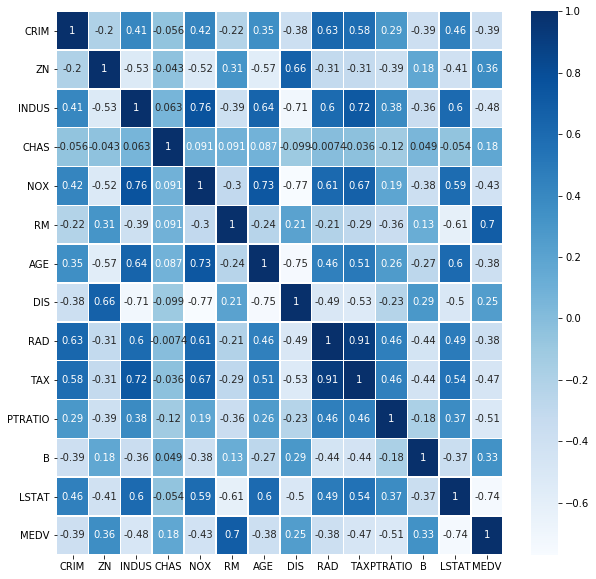

In [10]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sb.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax,cmap="Blues")

In [21]:
num_cols = list(df.select_dtypes(include=[int,float]).columns)
num_cols.remove("MEDV")
num_cols.remove("CHAS")

In [22]:
formula_str = df.columns[-1]+' ~ '+'+'.join(num_cols)
formula_str

'MEDV ~ CRIM+ZN+INDUS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [28]:
model=sm.ols(formula=formula_str, data=df)
fitted = model.fit()

In [30]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Sat, 11 Jul 2020   Prob (F-statistic):          7.30e-134
Time:                        18:21:02   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8920      5.147      7.168      0.0

In [32]:
def yes_no(b):
    if b:
        return 'Yes'
    else:
        return 'No'

df_result=pd.DataFrame()
df_result['pvalues']=fitted.pvalues[1:]
df_result['Features']=num_cols
df_result.set_index('Features',inplace=True)
df_result['Statistically significant?']= df_result['pvalues'].apply(yes_no)
df_result

,pvalues,Statistically significant?
Features,,
CRIM,6.861164e-04,Yes
ZN,7.336196e-04,Yes
INDUS,5.138885e-01,Yes
NOX,8.130111e-06,Yes
RM,1.664416e-18,Yes
AGE,8.344066e-01,Yes
DIS,6.635345e-13,Yes
RAD,1.104312e-06,Yes
TAX,2.870334e-04,Yes


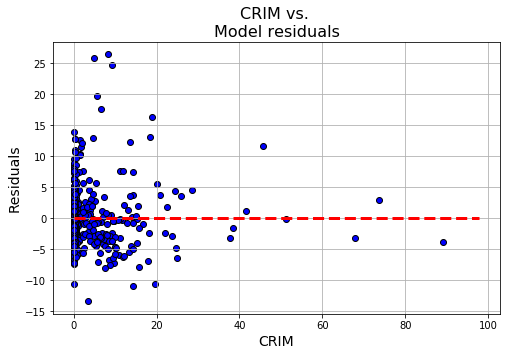

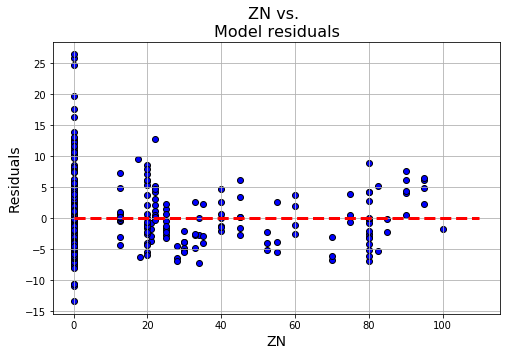

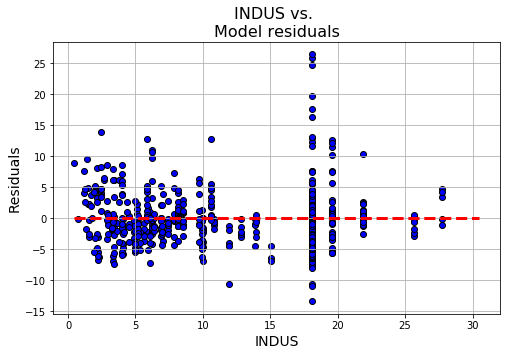

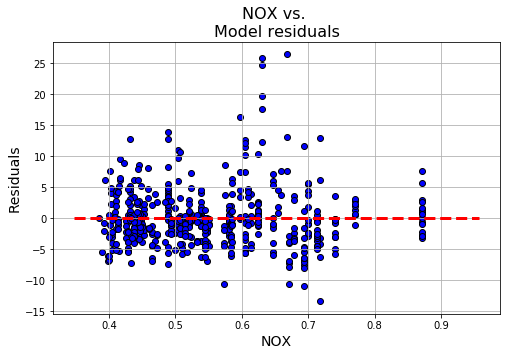

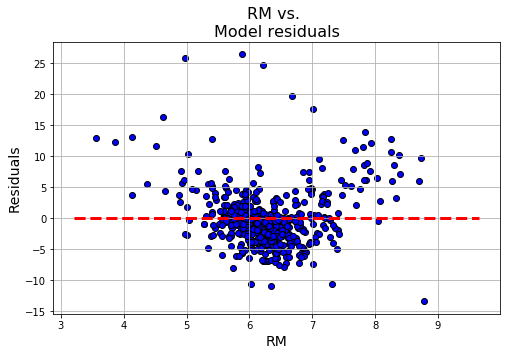

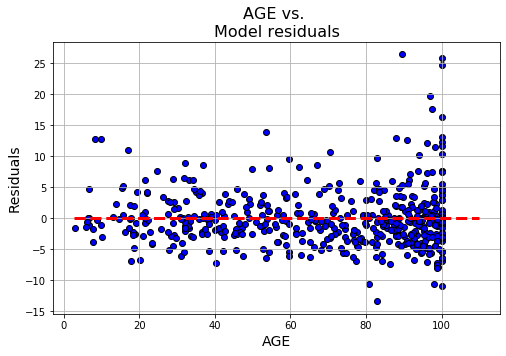

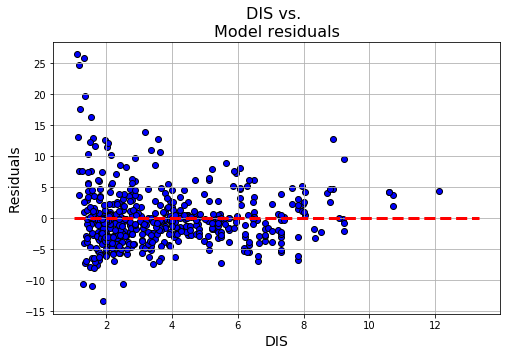

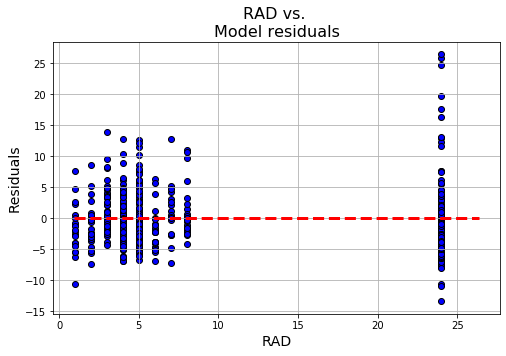

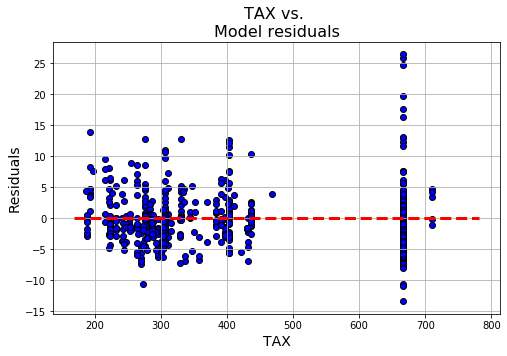

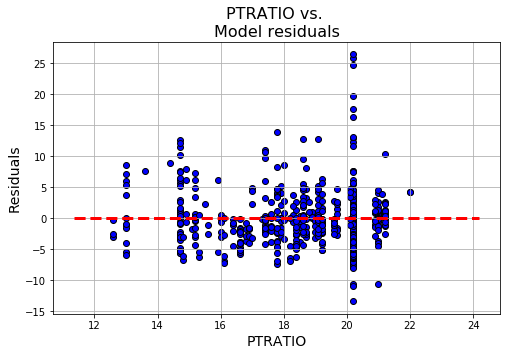

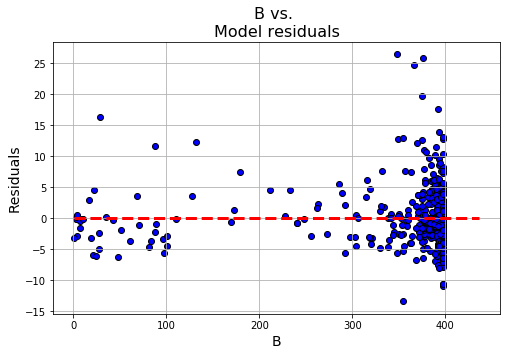

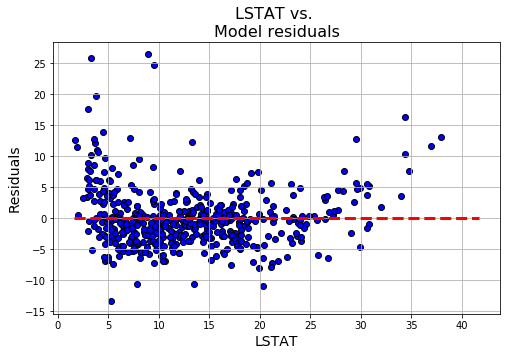

In [33]:
for c in num_cols:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=df[c],y=fitted.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(df[c])
    xmax = max(df[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

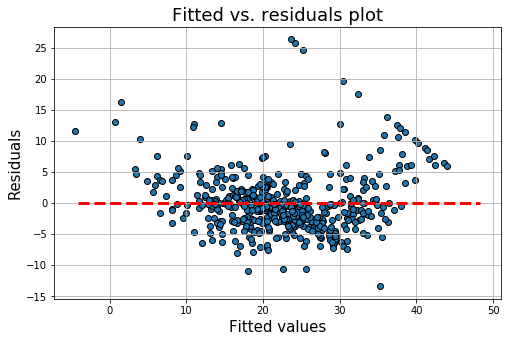

In [34]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin=min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

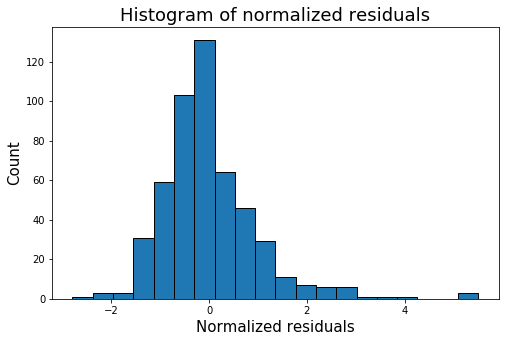

In [35]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

<Figure size 576x360 with 0 Axes>

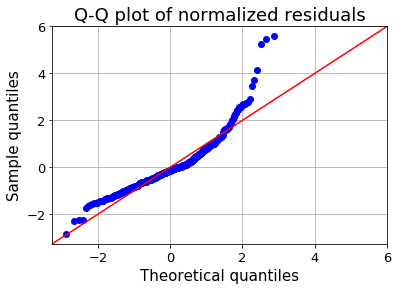

In [37]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

In [39]:
_,p=shapiro(fitted.resid)
if p<0.01:
    print("The residuals seem to come from Gaussian process")
else:
    print("The normality assumption may not hold")

The residuals seem to come from Gaussian process


/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


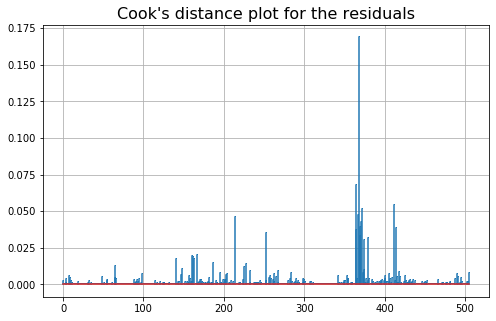

In [41]:
inf=influence(fitted)
(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.grid(True)
plt.show()

In [45]:
for i in range(len(num_cols)):
    v=vif(np.matrix(df[num_cols]),i)
    print("Variance inflation factor for {}: {}".format(num_cols[i],round(v,2)))

Variance inflation factor for CRIM: 2.1
Variance inflation factor for ZN: 2.84
Variance inflation factor for INDUS: 14.34
Variance inflation factor for NOX: 73.65
Variance inflation factor for RM: 77.55
Variance inflation factor for AGE: 21.34
Variance inflation factor for DIS: 14.7
Variance inflation factor for RAD: 15.0
Variance inflation factor for TAX: 60.36
Variance inflation factor for PTRATIO: 84.23
Variance inflation factor for B: 20.03
Variance inflation factor for LSTAT: 11.07
